In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,Dropout
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image

/home/parmeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/parmeet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from PIL import Image
rel_dir = "/storage/"
#rel_dir = ""

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.layers import AveragePooling2D
from keras.preprocessing import image
import numpy as np

In [4]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=True
)

# We'll extract features at the final pool layer.
model = Model(
    inputs=base_model.input,
    outputs=base_model.get_layer('avg_pool').output
)
def extract_image(image_path,model):
        img = image.load_img(image_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        return features[0]

In [5]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [6]:
labels = []
image_features = []

labels_test = []
image_features_test = []

images_path = "../split_images3"

for label in os.listdir(images_path):
    for folder in os.listdir(images_path + "/" +label):
        
        features = []
        labs = []
        
        file_path = images_path+"/"+label+"/"+folder
        listdir = np.array(sorted(os.listdir(file_path),key=lambda x: int(x.split(".")[0])))
        print(label,len(listdir))
        batch_sz = 100
        for file in listdir:
            features.append(np.array(extract_image(file_path+'/'+file,model))[0])
            labs.append(label)
        print("Done processing features")
        X_train,X_test,y_train,y_test = train_test_split(features,labs,shuffle=False,test_size=0.3)
        image_features = image_features + X_train
        labels = labels + y_train

        labels_test = labels_test + y_test
        image_features_test = image_features_test + X_test

Sept 5 Heli 39
Done processing features
Sept 5 Heli 191
Done processing features
Sept 5 Heli 37
Done processing features
Sept 5 Heli 329
Done processing features
Sept 5 Heli 41
Done processing features
Sept 5 Heli 57
Done processing features
Sept 5 Heli 48
Done processing features
Sept 5 Heli 45
Done processing features
Sept 5 Heli 32
Done processing features
Sept 5 Heli 87
Done processing features
Sept 5 Heli 339
Done processing features
Sept 5 Heli 5
Done processing features
Sept 5 Heli 21
Done processing features
Sept 5 Heli 129
Done processing features
Sept 5 Heli 119
Done processing features
Sept 5 Heli 166
Done processing features
Sept 5 Heli 174
Done processing features
Sept 5 Heli 273
Done processing features
Sept 5 Heli 94
Done processing features
Sept 5 Heli 37
Done processing features
Sept 5 Heli 281
Done processing features
Sept 5 Heli 35
Done processing features
Sept 5 Heli 97
Done processing features
Sept 5 Heli 10
Done processing features
Sept 5 Heli 34
Done processing f

Done processing features
Aug 26th 53
Done processing features
Aug 26th 69
Done processing features
Aug 26th 23
Done processing features
Aug 26th 64
Done processing features
Aug 26th 37
Done processing features
Aug 26th 28
Done processing features
Aug 26th 57
Done processing features
Aug 26th 12
Done processing features
Aug 26th 43
Done processing features
Aug 26th 119
Done processing features
Aug 26th 21
Done processing features
Aug 26th 184
Done processing features
Aug 26th 37
Done processing features
Aug 26th 37
Done processing features
Aug 26th 48
Done processing features
Aug 26th 75
Done processing features
Aug 26th 14
Done processing features
Aug 26th 442
Done processing features
Aug 26th 198
Done processing features
Aug 26th 37
Done processing features
Aug 26th 32
Done processing features
Aug 26th 65
Done processing features
Aug 26th 70
Done processing features
Aug 26th 42
Done processing features
Aug 26th 92
Done processing features
Aug 26th 44
Done processing features
Aug 26th 

Done processing features
Sept 8th 173
Done processing features
Aug 9th 112
Done processing features
Aug 9th 38
Done processing features
Aug 9th 42
Done processing features
Aug 9th 42
Done processing features
Aug 9th 109
Done processing features
Aug 9th 69
Done processing features
Aug 9th 53
Done processing features
Aug 9th 85
Done processing features
Aug 9th 62
Done processing features
Aug 9th 43
Done processing features
Aug 9th 87
Done processing features
Aug 9th 72
Done processing features
Aug 9th 37
Done processing features
Aug 9th 73
Done processing features
Aug 9th 36
Done processing features
Aug 9th 50
Done processing features
Aug 9th 28
Done processing features
Aug 9th 95
Done processing features
Sept 3rd B 108
Done processing features
Sept 3rd B 69
Done processing features
Sept 3rd B 46
Done processing features
Sept 3rd B 145
Done processing features
Sept 3rd B 58
Done processing features
Sept 3rd B 141
Done processing features
Sept 3rd B 92
Done processing features
Sept 3rd B 

In [32]:
num_labels = len(np.unique(labels))

In [33]:
image_f = np.array(image_features)
image_f_test = np.array(image_features_test)

In [34]:
num_of_train_examples = image_f.shape
print(num_of_train_examples)

(14105, 2048)


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [36]:
le.fit(list(labels)+list(labels_test))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1))+list(le_labels_test.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

In [37]:
image_input = Input(shape=(2048,))
output = Dense(num_labels,activation='softmax')(image_input)
model_dense = Model(image_input, output)
model_dense.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model_dense.save_weights('inception-simple-model.h5')

In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
validation_cvscores = []
test_cvscores = []
epochs = 1
for train, test in kf.split(image_f):
    model_dense.load_weights('inception-simple-model.h5')
    hist = model_dense.fit(image_f[train], one_labels[train], epochs=5, verbose=1)
    print(hist.history)
    val_score = model_dense.evaluate(image_f[test], one_labels[test], verbose=0)
    test_score = model_dense.evaluate(image_f_test, one_labels_test, verbose=0)
    validation_cvscores.append(val_score)
    test_cvscores.append(test_score)

Epoch 1/5
12694/12694 [==============================] - 3s 242us/step - loss: 0.1464 - acc: 0.9710
Epoch 2/5
12694/12694 [==============================] - 2s 120us/step - loss: 6.0354e-05 - acc: 1.0000
Epoch 3/5
12694/12694 [==============================] - 2s 119us/step - loss: 1.2419e-06 - acc: 1.0000
Epoch 4/5
12694/12694 [==============================] - 1s 117us/step - loss: 2.9731e-07 - acc: 1.0000
Epoch 5/5
12694/12694 [==============================] - 1s 116us/step - loss: 1.9149e-07 - acc: 1.0000
{'acc': [0.9710099259492674, 1.0, 1.0, 1.0, 1.0], 'loss': [0.14644413361561526, 6.03539251204593e-05, 1.2418730268053258e-06, 2.9730618746795737e-07, 1.9149201749151028e-07]}
Epoch 1/5
12694/12694 [==============================] - 2s 122us/step - loss: 0.1395 - acc: 0.9742
Epoch 2/5
12694/12694 [==============================] - 2s 123us/step - loss: 8.0100e-05 - acc: 1.0000
Epoch 3/5
12694/12694 [==============================] - 2s 119us/step - loss: 1.5690e-06 - acc: 1.0000
E

In [45]:
np.array(validation_cvscores)[:,1]*100

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [40]:
np.array(test_cvscores)[:,1]*100

array([69.03620433, 67.96164655, 69.2841792 , 70.01157216, 68.60638122,
       69.66440734, 69.4825591 , 69.4825591 , 69.49909076, 69.03620433])

In [49]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(np.array(validation_cvscores)[:,1]*100)
print(np.array(test_cvscores)[:,1]*100)
print(np.mean(np.array(validation_cvscores)[:,1]*100))
print(np.mean(np.array(test_cvscores)[:,1]*100))
print(np.std(np.array(validation_cvscores)[:,1]*100))
print(np.std(np.array(test_cvscores)[:,1]*100))

[100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00]
[69.04 67.96 69.28 70.01 68.61 69.66 69.48 69.48 69.50 69.04]
100.0
69.20648040998513
0.0
0.5540473680825306


In [46]:
print("Validation Standard Deviation",np.std(validation_cvscores))
print("Test Standard Deviation",np.std(test_cvscores))

Validation Standard Deviation 0.49999988176552435
Test Standard Deviation 1.0894991999139847


In [47]:
plt.plot(np.arange(epochs*num_of_batches),loss_values)
plt.title("Learning Curve")
plt.xlabel('Subsequent Batches')
plt.ylabel('Categorial Cross Entropy')

NameError: name 'num_of_batches' is not defined

NameError: name 'images_to_show' is not defined

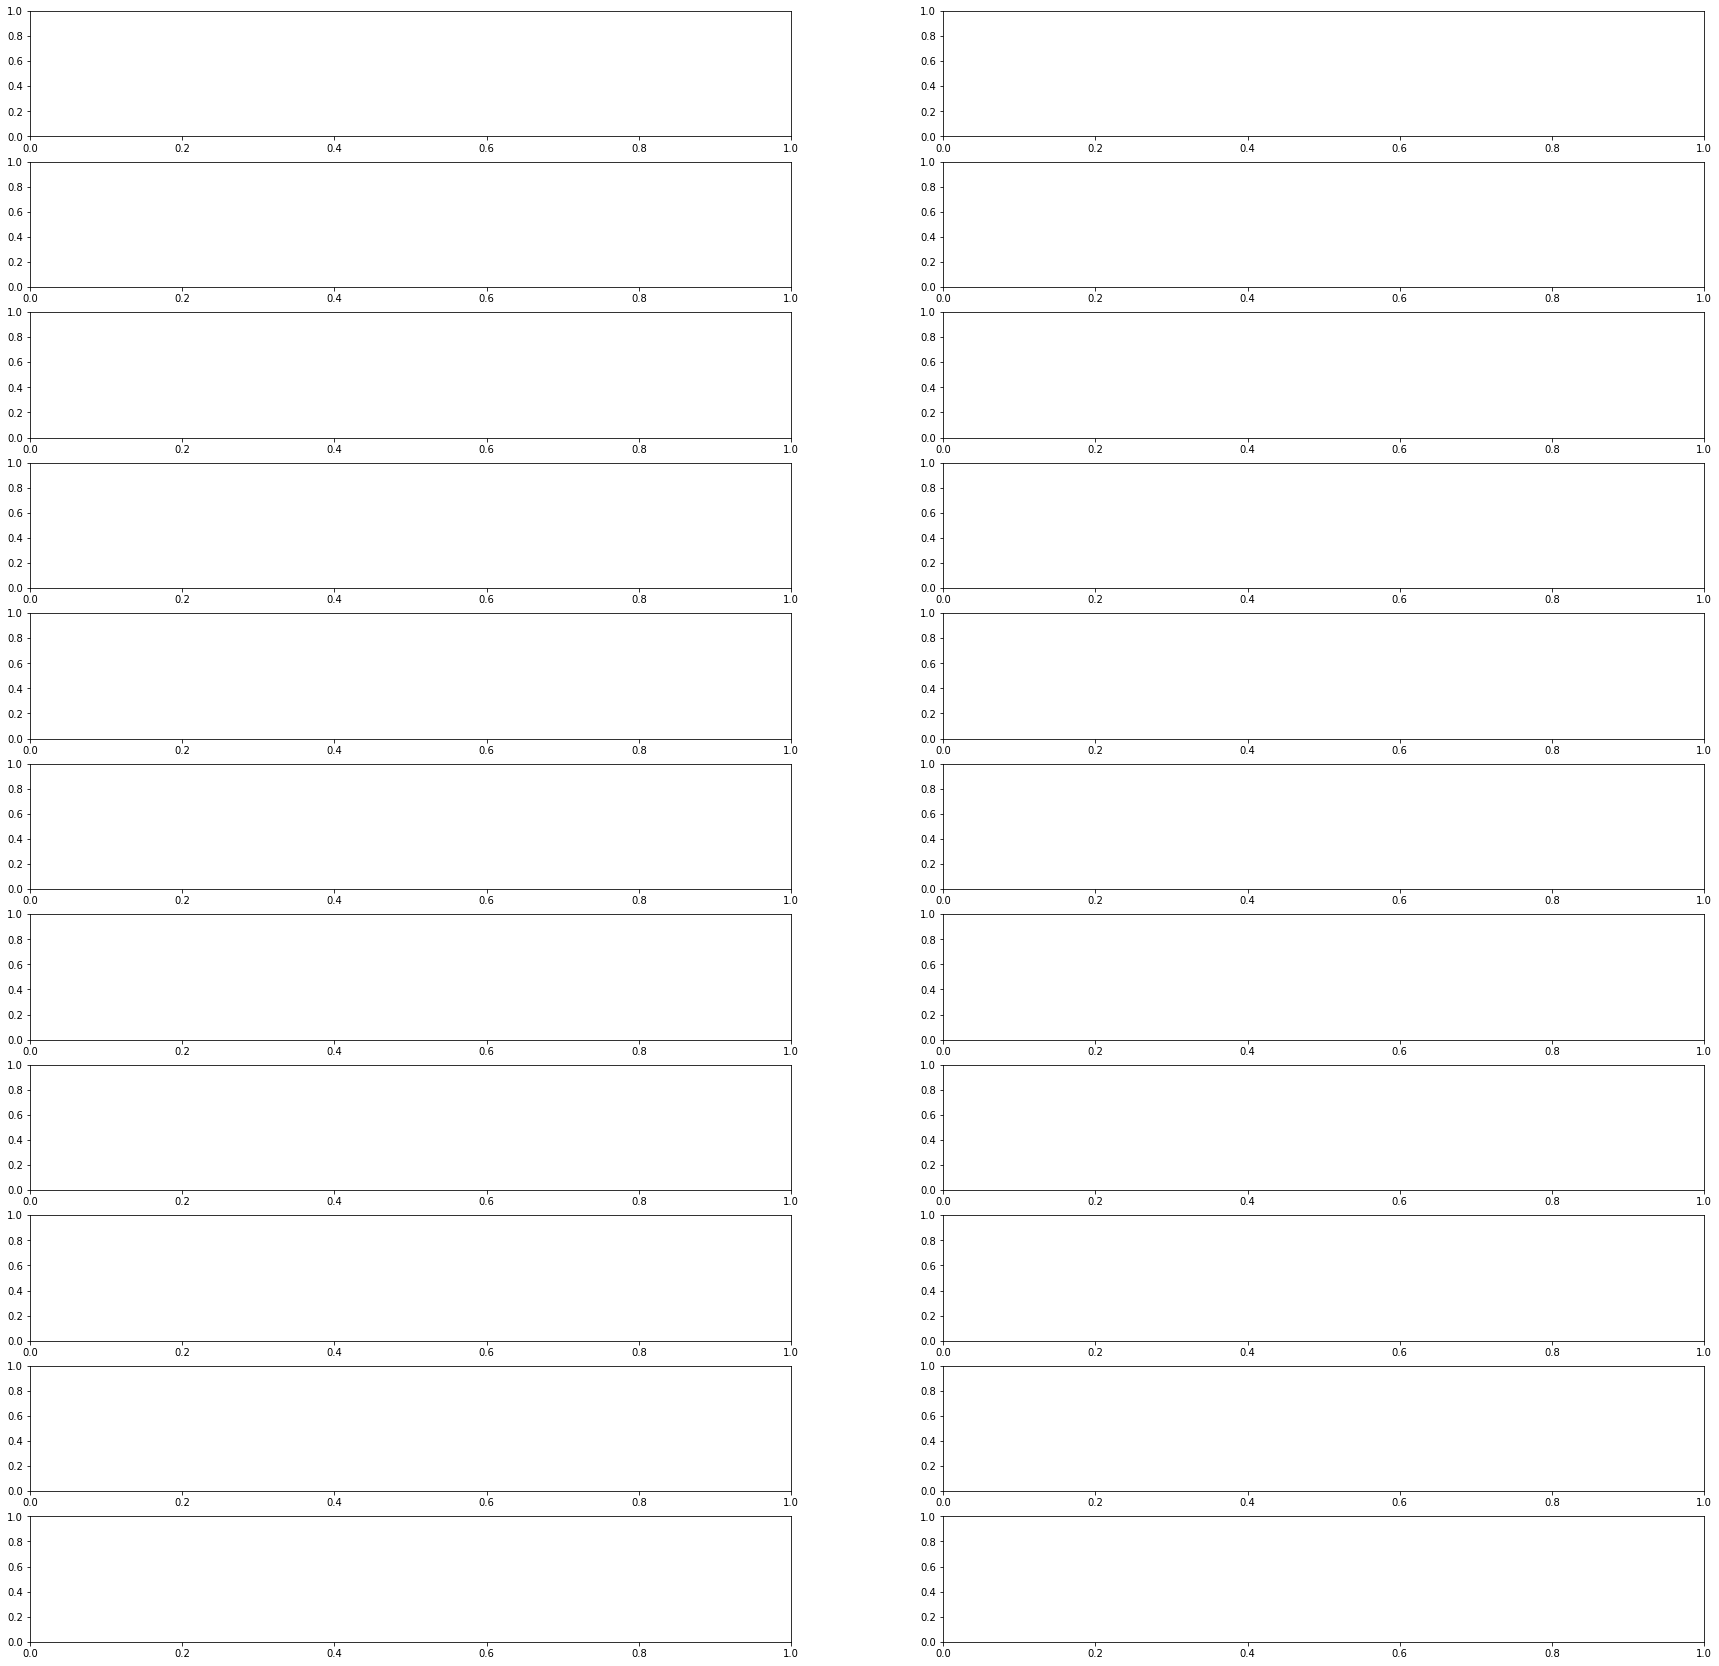

In [48]:
f, axarr = plt.subplots(num_labels,2)
f.set_figheight(30)
f.set_figwidth(30)
for i in range(num_labels):
    axarr[i,0].imshow(mpimg.imread(images_to_show[i][0]))
    axarr[i,0].title.set_text("train "+images_to_show[i][2])
    axarr[i,1].imshow(mpimg.imread(images_to_show[i][1]))
    axarr[i,1].title.set_text("test "+images_to_show[i][2])
plt.show()
plt.savefig('transferlearning.png')
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# image = mpimg.imread(images[0])
# plt.imshow(image)
# plt.show()